In [61]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [96]:
def plot_vector_field(A, axs, axs_range):
    x = np.linspace(min(axs_range['x_min'], -1.0), max(axs_range['x_max'], 1.0), 250)
    y = np.linspace(min(axs_range['y_min'], -1.0), max(axs_range['y_max'], 1.0), 250)

    X, Y = np.meshgrid(x, y)
    u, v = np.zeros(X.shape), np.zeros(Y.shape)
    speed = np.zeros(X.shape)
    NI, NJ = Y.shape

    for i in range(NI):
        for j in range(NJ):
            x = X[i, j]
            y = Y[i, j]

            vec_in = np.array([x, y])
            vec_out = A @ vec_in
            s = (vec_out - vec_in)

            u[i, j] = s[0]
            v[i, j] = s[1]
            speed[i, j] = np.linalg.norm(vec_out - vec_in)

    # speed = speed / speed.max()
    strm = axs.streamplot(X, Y, u, v, color=speed, linewidth=0.5, arrowsize=1.0, density=2.0)

    return strm

In [97]:
axs_range = {'x_min': -1.0, 'x_max': 1.0,
             'y_min': -1.0, 'y_max': 1.0}

t = 1e-3
A1 = np.array([[np.exp(1 * t), 0], [0, np.exp(-0.5 * t)]])
A2 = np.array([[1.0, t], [0, 1.0]])

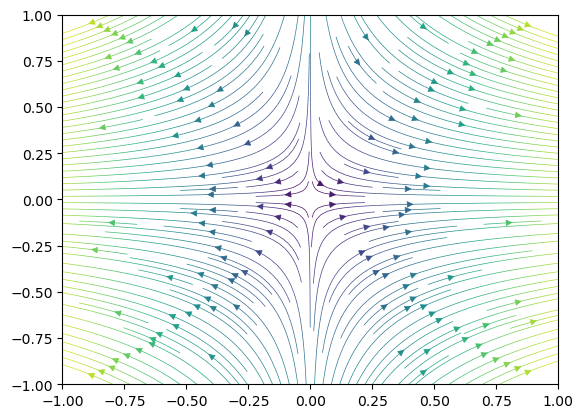

In [98]:
fig, axs = plt.subplots()
plot_vector_field(A1, axs, axs_range)
plt.show()

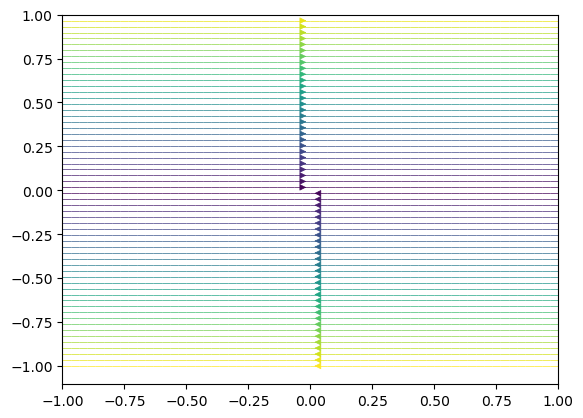

In [99]:
fig, axs = plt.subplots()
plot_vector_field(A2, axs, axs_range)
plt.show()

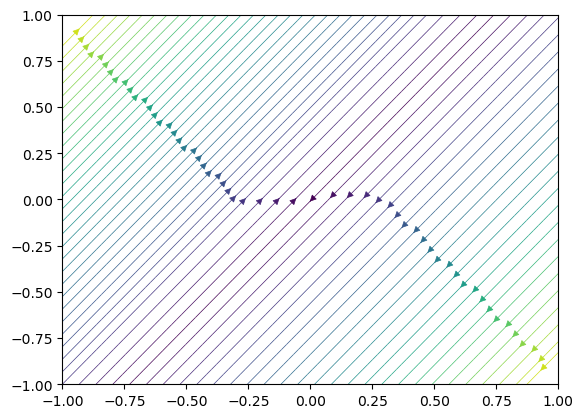

In [102]:
T = np.random.randn(2, 2)
T = T @ T.T
A3 = np.linalg.inv(T) @ A2 @ T

fig, axs = plt.subplots()
plot_vector_field(A3, axs, axs_range)
plt.show()